### Questionnaires (qs.csv) - [One record per questionnaire per question per time point per visit per subject]

This dataset contains info on:
- **EDSS**
- FS scores 
- RAND-36 
- SF-12 
- BDI-II

In [37]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_19944\2053704189.py:17: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [2]:
missing_percentage_qs = (qs.isnull().sum() / len(qs)) * 100
missing_qs = pd.DataFrame({'Column Name': missing_percentage_qs.index, 'Missing Percentage': missing_percentage_qs.values})
missing_qs = missing_qs.sort_values(by='Missing Percentage', ascending=False)
print(missing_qs)

   Column Name  Missing Percentage
29    QSRFTDTC          100.000000
28    QSTPTREF          100.000000
5       QSSPID          100.000000
27      QSELTM          100.000000
26    QSTPTNUM          100.000000
25       QSTPT          100.000000
23       QSDTC          100.000000
11    QSORRESU          100.000000
19      QSEVAL          100.000000
18     QSDRVFL          100.000000
14    QSSTRESU          100.000000
16    QSREASND           99.997550
15      QSSTAT           99.643583
17      QSBLFL           89.925420
22     VISITDY           82.796628
4      QSGRPID           80.735645
30    QSEVLINT           65.621993
9       QSSCAT           59.320312
24        QSDY           24.402110
13    QSSTRESN            0.578733
10     QSORRES            0.476263
12    QSSTRESC            0.356417
1       DOMAIN            0.000000
20    VISITNUM            0.000000
21       VISIT            0.000000
8        QSCAT            0.000000
7       QSTEST            0.000000
6     QSTESTCD      

Remove columns with more than 80% missingness as well as redundant columns.

In [3]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_qs[missing_qs['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
qs = qs.drop(columns=columns_to_drop)

# Remove redundant columns
qs = qs.drop(columns=['STUDYID', 'DOMAIN', 'QSTESTCD', 'QSORRES'])

In [4]:
qs.sort_values(by=['USUBJID', 'QSSEQ'], inplace=True)
qs.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216854,MSOAC/0014,2,KFSS1-Pyramidal Functions,KFSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216855,MSOAC/0014,3,KFSS1-Cerebellar Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216856,MSOAC/0014,4,KFSS1-Brain Stem Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216857,MSOAC/0014,5,KFSS1-Sensory Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **QSTESTCD**: Question Short Name (contains the same info as QSTEST = Question Name)
- **QSORRES**: Finding in Original Units (contains the same info as "QSSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of QSORRES)
- **QSRFTDTC, QSTPTREF, QSSPID, QSELTM, QSTPTNUM, QSTPT, QSDTC, QSORRESU, QSEVAL, QSDRVFL, QSSTRESU**: all values missing and not even mentioned in the data dictionary 
- **QSREASND**: Reason Not Performed (missing for 99.998% of observations)
- **QSSTAT**: Completion Status (missing for 99.6% of observations)
- **QSBLFL**: Baseline Flag (missing for 89.9% of observations)
- **VISITDY**: Visit Day (missing for 82.8% of observations) -- **maybe keep this one since we also keep it for some other datasets**
- **QSGRPID**: Group ID (missing for 80.7% of observations)

In [5]:
unique_usubjid_count = qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in the dataset for the questionnaires**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [6]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in qs.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,QSSEQ,numeric
2,QSTEST,categorical
3,QSCAT,categorical
4,QSSCAT,categorical
5,QSSTRESC,categorical
6,QSSTRESN,numeric
7,VISITNUM,numeric
8,VISIT,categorical
9,QSDY,numeric


- Descriptive statistics for numeric variables

In [7]:
numeric_columns = ['QSSEQ', 'QSSTRESN', 'VISITNUM', 'QSDY']

descriptive_numeric = {
    'Count': qs[numeric_columns].count(),
    'Missing Cases': qs[numeric_columns].isna().sum(),
    'Missing %': round((qs[numeric_columns].isna().sum() / len(qs)) * 100, 2),  
    'Median': qs[numeric_columns].median(),
    'Standard Deviation': qs[numeric_columns].std()
}

num_qs = pd.DataFrame(descriptive_numeric)
num_qs

,Count,Missing Cases,Missing %,Median,Standard Deviation
QSSEQ,448912,0,0.00,99.0,79.650454
QSSTRESN,446314,2598,0.58,2.0,1.861824
VISITNUM,448912,0,0.00,20.0,229.172925
QSDY,339368,109544,24.40,253.0,315.596324


- QSSEQ (Sequence number)

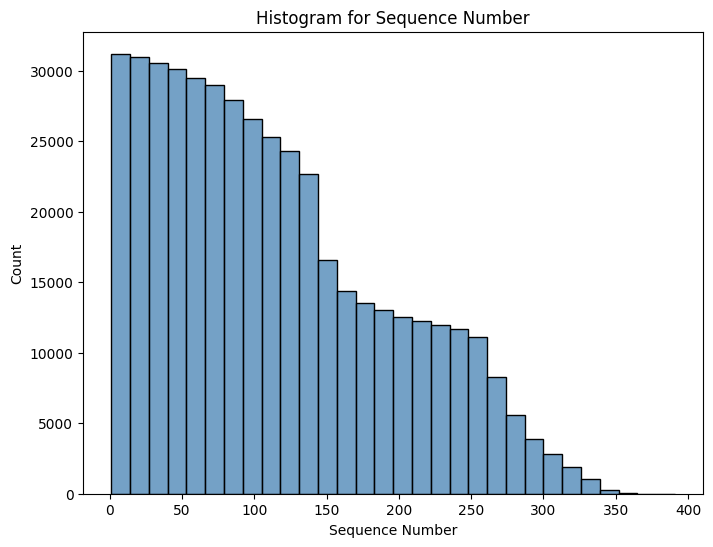

In [8]:
QSSEQ = qs['QSSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- QSSTRESN (Numeric Finding in Standard Units)

In [9]:
# Filter rows for EDSS
filtered_rows = qs[qs['QSTEST']=='EDSS01-Expanded Disability Score']

# Group by EDSS and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts

,QSTEST,USUBJID,Observation_Count
0,EDSS01-Expanded Disability Score,MSOAC/0014,4
1,EDSS01-Expanded Disability Score,MSOAC/0016,1
2,EDSS01-Expanded Disability Score,MSOAC/0019,14
3,EDSS01-Expanded Disability Score,MSOAC/0024,10
4,EDSS01-Expanded Disability Score,MSOAC/0030,5
...,...,...,...
2460,EDSS01-Expanded Disability Score,MSOAC/9986,5
2461,EDSS01-Expanded Disability Score,MSOAC/9987,16
2462,EDSS01-Expanded Disability Score,MSOAC/9995,20
2463,EDSS01-Expanded Disability Score,MSOAC/9998,14


In [10]:
outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
EDSS01-Expanded Disability Score,2465.0,10.663286,5.024798,1.0,6.0,11.0,14.0,35.0


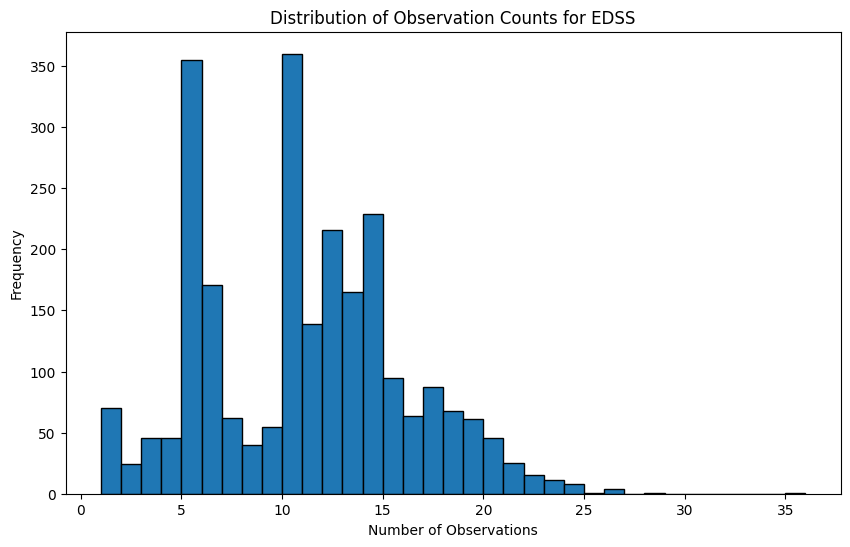

In [11]:
    plt.figure(figsize=(10, 6))
    plt.hist(outcome_measure_counts['Observation_Count'], bins=range(1, max(outcome_measure_counts['Observation_Count']) + 2), edgecolor='black')
    plt.title(f'Distribution of Observation Counts for EDSS')
    plt.xlabel('Number of Observations')
    plt.ylabel('Frequency')
    plt.show()

- VISITNUM (Visit Number)

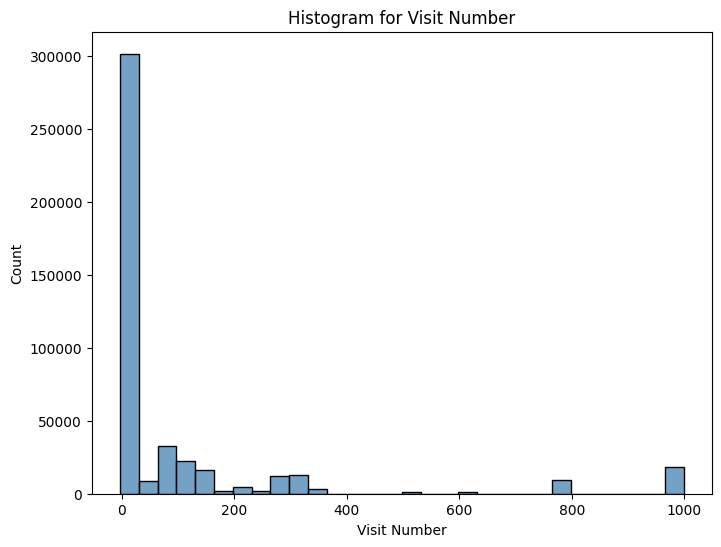

In [12]:
VISITNUM_qs = qs['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_qs, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- QSDY (Study Day of Collection) 

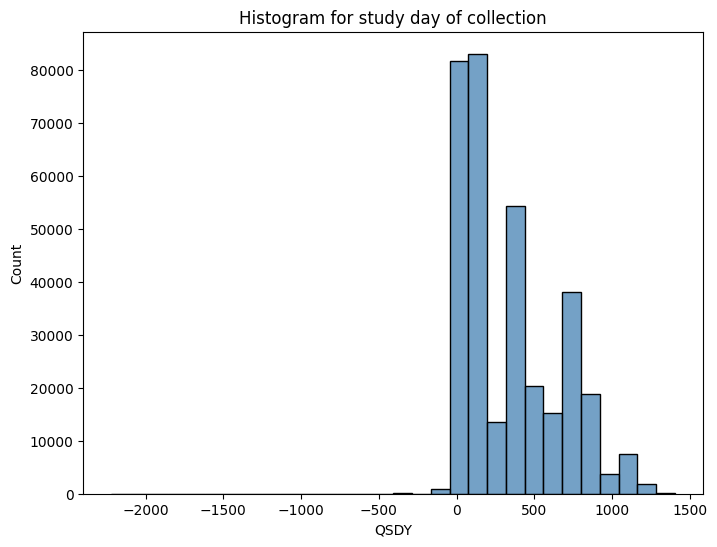

In [13]:
QSDY = qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [14]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [15]:
unique_QSDY_values_count = qs['QSDY'].nunique()
unique_QSDY_values_count

1091

1091 unique values of study day of collection

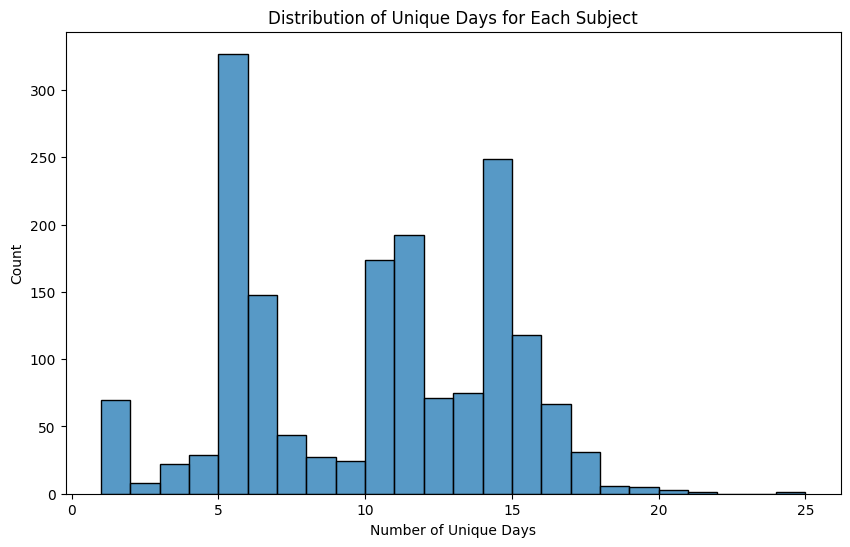

In [16]:
subject_days_count = qs.groupby('USUBJID')['QSDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False)
plt.title('Distribution of Unique Days for Each Subject')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

Distribution of the length of follow-up

Number of unique values in the 'Difference' column: 503


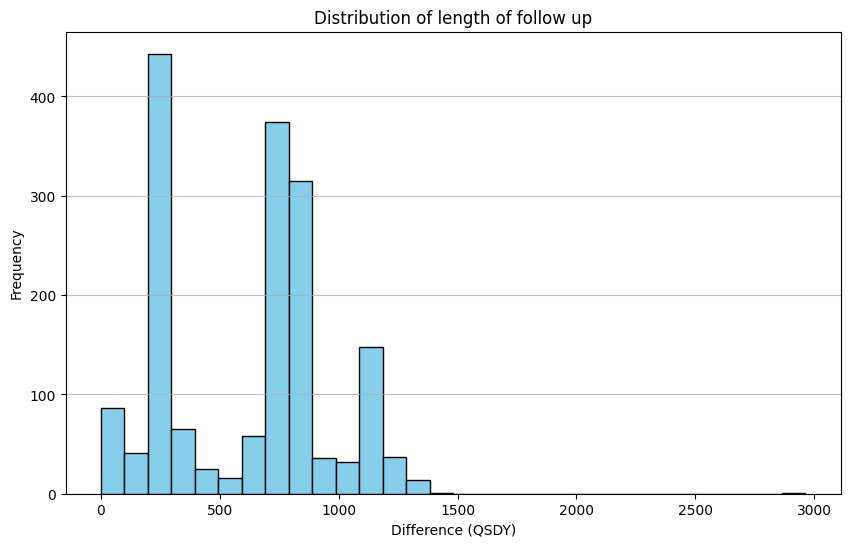

In [83]:
# Calculate the maximum and minimum values of QSDY for each unique patient ID
qs_max_min = qs.groupby('USUBJID')['QSDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
qs_max_min['Difference'] = qs_max_min['max'] - qs_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = qs_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

# Plot the histogram of the distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(qs_max_min['Difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of follow up')
plt.xlabel('Difference (QSDY)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Descriptive statistics for categorical variables

In [17]:
categorical_columns = ['QSTEST', 'QSCAT', 'QSSCAT', 'QSSTRESC', 'VISIT', 'QSEVLINT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': qs[col].count(),
        'Missing Cases': qs[col].isna().sum(),
        'Unique Values': qs[col].nunique(),
        'Mode': qs[col].mode().values[0],
        'Mode Frequency': qs[col].value_counts().max()
    }

cat_qs = pd.DataFrame(descriptive_categorical).T
cat_qs

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
QSTEST,448912,0,82,EDSS01-Expanded Disability Score,26285
QSCAT,448912,0,5,KFSS,188254
QSSCAT,182616,266296,14,PHYSICAL FUNCTIONING,48763
QSSTRESC,447312,1600,166,0,110990
VISIT,448912,0,110,BASELINE,39162
QSEVLINT,154327,294585,2,-P4W,104924


- Number of observations for each QSTEST (Question Name) category

In [18]:
QSTEST_counts = qs['QSTEST'].value_counts().reset_index()
QSTEST_counts.columns = ['QSTEST', 'Count']
QSTEST_counts

,QSTEST,Count
0,EDSS01-Expanded Disability Score,26285
1,KFSS1-Sensory Functions,26219
2,KFSS1-Brain Stem Functions,26218
3,KFSS1-Bowel and Bladder Functions,26217
4,KFSS1-Cerebral or Mental Functions,26216
...,...,...
77,SF121-Amt Time Interfere Social Activity,1491
78,SF121-Phys Health: Limit Kind of Work,1490
79,KFSS1-Other Functions Specify,575
80,KFSS1-Weakness Interferes With Testing,423


- Number of observations for each QSCAT (Category of Question) category

In [19]:
QSCAT_counts = qs['QSCAT'].value_counts().reset_index()
QSCAT_counts.columns = ['QSCAT', 'Count']
QSCAT_counts

,QSCAT,Count
0,KFSS,188254
1,RAND-36 V1.0,164716
2,BDI-II,51756
3,EDSS,26285
4,SF-12 V2,17901


- Number of observations for each QSSCAT (subcategory for question) category

In [20]:
QSSCAT_counts = qs['QSSCAT'].value_counts().reset_index()
QSSCAT_counts.columns = ['QSSCAT', 'Count']
QSSCAT_counts

,QSSCAT,Count
0,PHYSICAL FUNCTIONING,48763
1,GENERAL HEALTH,24348
2,EMOTIONAL WELL-BEING,22887
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305
4,ENERGY/FATIGUE,18304
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718
6,SOCIAL FUNCTIONING,10630
7,PAIN,9149
8,HEALTH CHANGE,4581
9,ROLE EMOTIONAL,2984


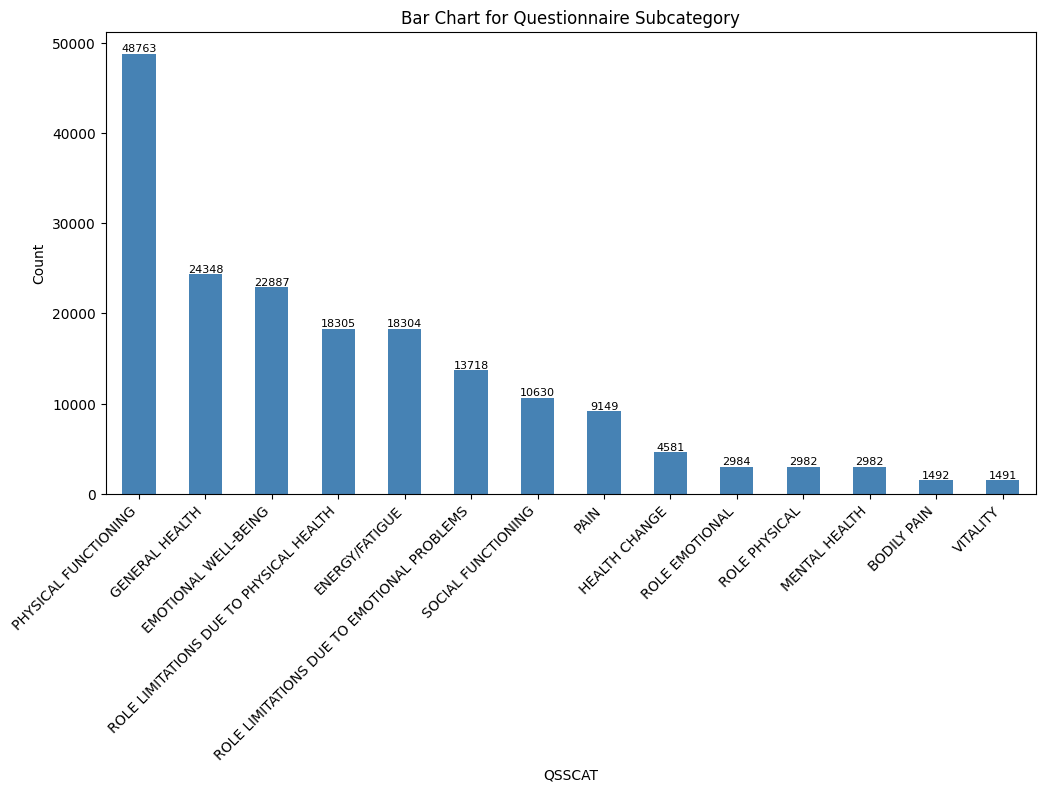

In [21]:
plt.figure(figsize=(12, 6))
ax = qs['QSSCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('QSSCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Questionnaire Subcategory')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- Number of observations for each QSSTRESC (Character Result/Finding in Std Format) category

- Number of observations for each VISIT (Visit Name) category 

In [22]:
VISIT_counts = qs['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,BASELINE,39162
1,WEEK 24,32337
2,WEEK 12,22797
3,DAY 1,20853
4,MONTH 12,14275
...,...,...
105,VISIT8A MTH 6,32
106,END OF TREATMENT,22
107,MONTH 48,16
108,RELAPSE VISIT 5,16


- Number of observations for each QSEVLINT (Evaluation Interval) category 

In [23]:
QSEVLINT_counts = qs['QSEVLINT'].value_counts().reset_index()
QSEVLINT_counts.columns = ['QSEVLINT', 'Count']
QSEVLINT_counts

,QSEVLINT,Count
0,-P4W,104924
1,-P2W,49403


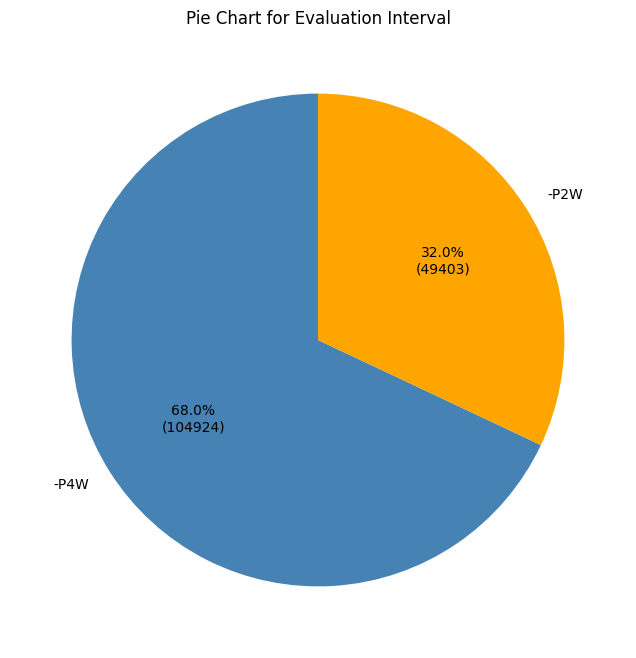

In [24]:
QSEVLINT_counts = qs['QSEVLINT'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(QSEVLINT_counts, labels=QSEVLINT_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(QSEVLINT_counts) / 100), startangle=90, colors=['steelblue', 'orange', 'green', 'red', 'purple'])
plt.title('Pie Chart for Evaluation Interval')
plt.show()

alleen BDI total score is numeriek, fix mistakes (bv EDSS van 3.6, inspect all graphs)

### Create a static dataframe

In [26]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [27]:
missing_percentages = qs.groupby('QSCAT')['QSDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome category:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome category:
QSCAT
BDI-II           0.00
EDSS            41.14
KFSS            51.98
RAND-36 V1.0     0.53
SF-12 V2         0.00
Name: QSDY, dtype: float64


#### EDSS

In [28]:
EDSS_rows = qs[qs['QSCAT'] == 'EDSS']
EDSS_rows['QSDY'].describe()

count    15471.000000
mean       325.069937
std        297.286138
min       -407.000000
25%         85.000000
50%        254.000000
75%        547.000000
max       1404.000000
Name: QSDY, dtype: float64

In [33]:
# Create subsets for different time periods
before_study_start = qs[qs['QSDY'] < 1]
two_years_after_start = qs[(qs['QSDY'] >= 1) & (qs['QSDY'] <= 730)]
four_years_after_start = qs[qs['QSDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['QSCAT'] == 'EDSS']
    outcome_measure_counts = filtered_rows.groupby(['QSCAT', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSCAT')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')



Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1692.0,9.143617,3.986531,1.0,5.0,10.0,12.0,21.0


In [30]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1622.0,7.413687,2.72143,1.0,5.0,9.0,9.0,18.0


In [34]:
count_observations(four_years_after_start, '4 Years After Study Start')


4 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,647.0,2.629057,1.363485,1.0,2.0,2.0,4.0,8.0


It doesn't seem to be a good grouping here - but I want to look at maximum EDSS score and not calculate a median or mean so maybe I just track the maximum EDSS each year?

I think the calculation beneath is still not entirely correct - I spent hours on tweaking this because i kept getting wrong results it's already a bit better now

In [76]:
# Filter the DataFrame to include only the specified FTTEST values
EDSS_df = EDSS_rows.copy()  # Create a copy to avoid the warning

# Calculate the maximum value of QSSTRESN for each different value of QS_PERIOD
max_EDSS_df = EDSS_df.groupby(['USUBJID'])['QSSTRESN'].max().reset_index()

# Define the time periods
time_periods = {'before': 0, '1y': 365, '2y': 730, '3y': 1095, '4y': 1460}

# Initialize columns for each time period
for period in time_periods.keys():
    max_EDSS_df[f'EDSS_{period}'] = np.nan

# Fill columns with the maximum value based on time periods
for period, end_day in time_periods.items():
    mask = EDSS_df['QSDY'] <= end_day
    max_values = EDSS_df[mask].groupby('USUBJID')['QSSTRESN'].max().reset_index()
    max_EDSS_df.loc[max_EDSS_df['USUBJID'].isin(max_values['USUBJID']), f'EDSS_{period}'] = max_values['QSSTRESN']

# Calculate the maximum EDSS score for patients with NaN QSDY and assign to corresponding rows
nan_values = EDSS_df[EDSS_df['QSDY'].isna()].groupby('USUBJID')['QSSTRESN'].max().reset_index()
max_EDSS_df.loc[max_EDSS_df['USUBJID'].isin(nan_values['USUBJID']), 'EDSS_NaN'] = nan_values['QSSTRESN']

# Drop the unwanted QSSTRESN column
max_EDSS_df = max_EDSS_df.drop(columns=['QSSTRESN'])

max_EDSS_df.head(20)

,USUBJID,EDSS_before,EDSS_1y,EDSS_2y,EDSS_3y,EDSS_4y,EDSS_NaN
0,MSOAC/0014,NaN,NaN,NaN,NaN,NaN,2.0
1,MSOAC/0016,4.0,4.0,4.0,4.0,4.0,NaN
2,MSOAC/0019,4.0,4.0,4.0,4.0,4.0,NaN
3,MSOAC/0024,2.0,2.0,2.0,2.0,2.0,NaN
4,MSOAC/0030,1.0,1.5,1.5,1.5,1.5,NaN
5,MSOAC/0031,6.5,7.5,7.5,7.5,7.5,NaN
6,MSOAC/0034,NaN,NaN,NaN,NaN,NaN,3.0
7,MSOAC/0035,NaN,NaN,NaN,NaN,NaN,1.5
8,MSOAC/0041,6.5,7.5,8.0,8.0,8.0,NaN
9,MSOAC/0044,NaN,NaN,NaN,NaN,NaN,4.5


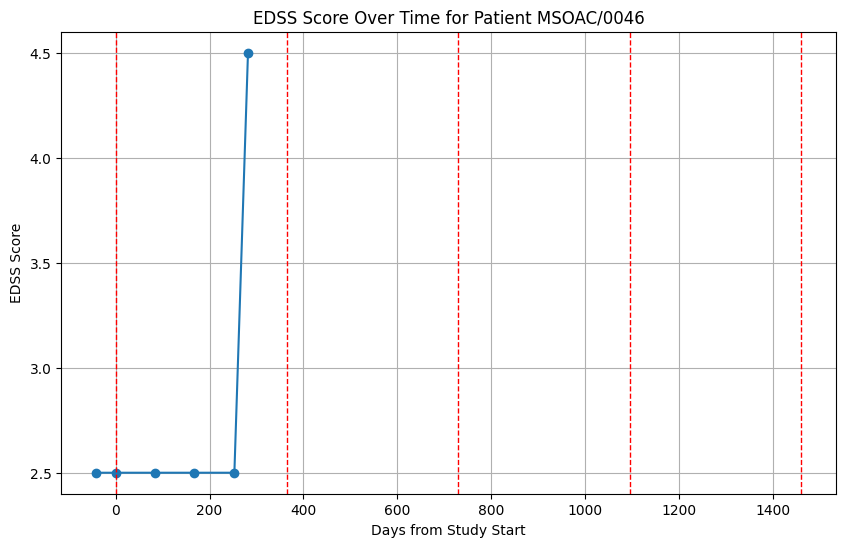

In [80]:
import matplotlib.pyplot as plt

# Choose the patient_id
patient_id = 'MSOAC/0046'
#patient_id = 'MSOAC/0076'

# Filter the DataFrame for the specific patient
patient_data = EDSS_rows[EDSS_rows['USUBJID'] == patient_id]

# Plot the EDSS score over time
plt.figure(figsize=(10, 6))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o', linestyle='-')
plt.title(f'EDSS Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('EDSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSSTRESN'].min()
max_value = patient_data['QSSTRESN'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 365, 730, 1095, 1460]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)

plt.show()


          QSDY QS_PERIOD
214058   -27.0    before
45         1.0        1y
168434    93.0        1y
191059   184.0        1y
197903   263.0        1y
100932   360.0        1y
121596   451.0        2y
128035   542.0        2y
134006   626.0        2y
148174   724.0        2y
159601   808.0        3y
72789    899.0        3y
176617   989.0        3y
179096  1088.0        3y
      USUBJID QS_PERIOD  QSSTRESN
2  MSOAC/0019        1y       3.5
3  MSOAC/0019        2y       3.5
4  MSOAC/0019        3y       3.0
5  MSOAC/0019    before       4.0


,USUBJID,EDSS-1y,EDSS-2y,EDSS-3y,EDSS-4y,EDSS-NaN,EDSS-before
0,MSOAC/0014,NaN,NaN,NaN,NaN,2.0,NaN
4,MSOAC/0016,NaN,NaN,NaN,NaN,NaN,6.0
5,MSOAC/0019,3.5,3.5,3.0,NaN,NaN,4.0
19,MSOAC/0024,4.0,4.0,NaN,NaN,NaN,4.0
29,MSOAC/0030,2.0,NaN,NaN,NaN,NaN,2.0
34,MSOAC/0031,1.5,1.0,1.5,NaN,NaN,1.0
48,MSOAC/0034,NaN,NaN,NaN,NaN,1.5,NaN
67,MSOAC/0035,NaN,NaN,NaN,NaN,2.5,NaN
75,MSOAC/0041,7.5,NaN,NaN,NaN,NaN,6.5
82,MSOAC/0044,NaN,NaN,NaN,NaN,6.0,NaN


In [49]:
import numpy as np
import pandas as pd

# Assuming your DataFrame is named EDSS_rows

# Filter the DataFrame to include only the specified FTTEST values
EDSS_df = EDSS_rows.copy()  # Create a copy to avoid the warning

# Define the periods
periods = [0, 365, 730, 1095, 1460]  # You can adjust these as needed

# Create the new column "QS_PERIOD"
EDSS_df['QS_PERIOD'] = np.select(
    [EDSS_df['QSDY'] <= period for period in periods],
    [f'{period}d' for period in periods],
    default='NaN'
)

# Calculate the cumulative maximum value of QSSTRESN for each different value of QS_PERIOD
cum_max_EDSS_df = EDSS_df.groupby(['USUBJID', 'QS_PERIOD'])['QSSTRESN'].cummax()

# Combine 'USUBJID' and 'QS_PERIOD' into a new DataFrame
combined_df = pd.concat([EDSS_df[['USUBJID', 'QS_PERIOD']], cum_max_EDSS_df], axis=1)

# Pivot the table
pivot_EDSS_df = combined_df.pivot_table(
    index='USUBJID',
    columns='QS_PERIOD',
    values='QSSTRESN',
    aggfunc='max'
).reset_index()

# Map the QS_PERIOD values to desired labels
period_labels = {
    '0d': 'before',
    '365d': '1y',
    '730d': '2y',
    '1095d': '3y',
    '1460d': '4y'
}
pivot_EDSS_df.columns = [period_labels.get(col, col) for col in pivot_EDSS_df.columns]

# Reorder the columns
column_order = ['before', '1y', '2y', '3y', '4y']
pivot_EDSS_df = pivot_EDSS_df[column_order].copy()

# Merge the new DataFrame with the original DataFrame on 'USUBJID'
result_EDSS = pd.merge(EDSS_df[['USUBJID']], pivot_EDSS_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient
result_EDSS = result_EDSS.drop_duplicates(subset='USUBJID')

result_EDSS.head(50)


KeyError: 'USUBJID'

In [50]:
EDSS_rows

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
0,MSOAC/0014,9,EDSS01-Expanded Disability Score,EDSS,NaN,1.5,1.5,2.0,BASELINE,NaN,NaN
168426,MSOAC/0014,17,EDSS01-Expanded Disability Score,EDSS,NaN,2,2.0,7.0,MONTH 3,NaN,NaN
86626,MSOAC/0014,25,EDSS01-Expanded Disability Score,EDSS,NaN,2,2.0,777.0,END OF STUDY,NaN,NaN
205218,MSOAC/0016,1,EDSS01-Expanded Disability Score,EDSS,NaN,6,6.0,1.0,SCREENING,-21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
138302,MSOAC/9999,65,EDSS01-Expanded Disability Score,EDSS,NaN,4,4.0,13.0,MONTH 21,NaN,NaN
89023,MSOAC/9999,73,EDSS01-Expanded Disability Score,EDSS,NaN,4,4.0,777.0,END OF STUDY,NaN,NaN
223395,MSOAC/9999,81,EDSS01-Expanded Disability Score,EDSS,NaN,4,4.0,779.0,STUDY COMPLETION,NaN,NaN
234412,MSOAC/9999,89,EDSS01-Expanded Disability Score,EDSS,NaN,3,3.0,999.0,UNSCHEDULED,NaN,NaN
